# Thông Tin
1. MSSV: 20520079
2. Họ và tên: Nguyễn Tư Thành Nhân
3. Bài tập: Bài tập 1
4. Ngày thực hiện: 07/04/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap2/images

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap2/images


## Yêu cầu 1.

Đọc ảnh và hiển thị ảnh kết quả sau khi dò tìm cạnh: Gx, Gy và G

2 ảnh: Bicycle.jpg và ( bansoxe.jpg hoặc
houseg.bmp)

In [ ]:
import os
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def sobel_filters(img):
    Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
    Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)
    Ix = cv2.filter2D(img, -1, Sx)
    Iy = cv2.filter2D(img, -1, Sy)
    G=np.hypot(Ix,Iy)
    G=np.array(G/G.max()*255, np.uint8)
    theta=np.arctan2(Iy,Ix)
    return Ix,Iy,G,theta

In [ ]:
def FindGradient(source):
  img = cv2.imread(source, 0)
  Gx, Gy, G, theta = sobel_filters(img)

  plt.figure(figsize = (20, 5))

  plt.subplot(1,4,1)
  plt.title("Origin")
  plt.axis('off')
  plt.imshow(img, cmap='gray')

  plt.subplot(1,4,2)
  plt.title("Gx")
  plt.axis('off')
  plt.imshow(Gx, cmap='gray')

  plt.subplot(1,4,3)
  plt.title("Gy")
  plt.axis('off')
  plt.imshow(Gy, cmap='gray')
  
  plt.subplot(1, 4, 4)
  plt.title("G")
  plt.axis('off')
  plt.imshow(G, cmap='gray')

  plt.suptitle(source.split('.')[0]) 

  plt.show()

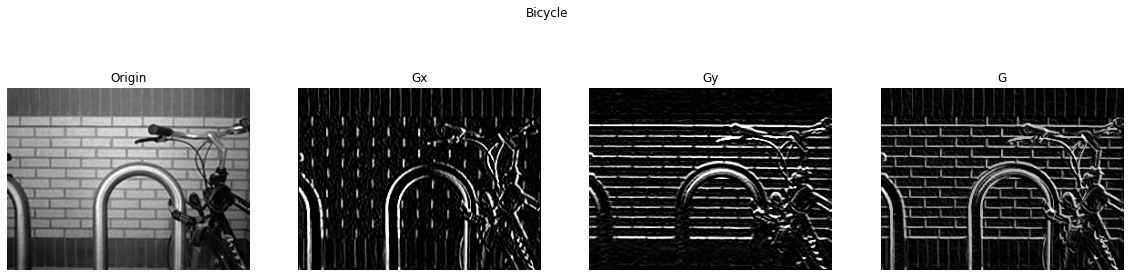

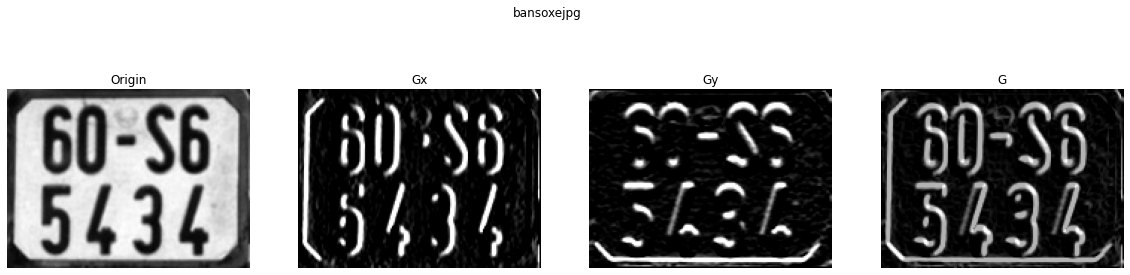

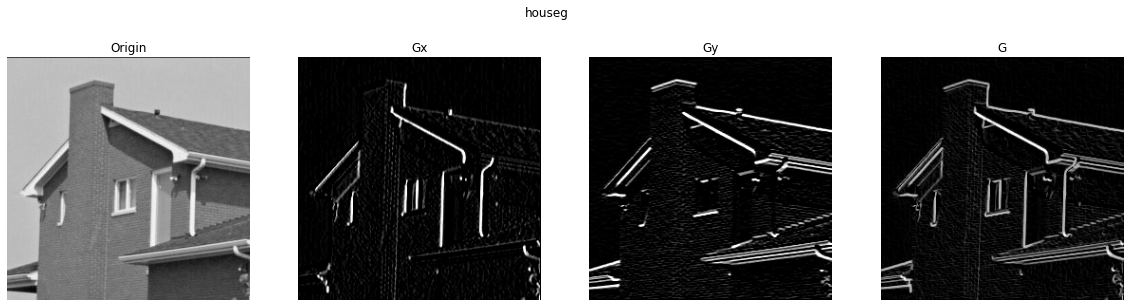

In [ ]:
for img_path in ["Bicycle.jpg", 'bansoxejpg.jpg',"houseg.bmp"]:
    FindGradient(img_path)
    print('\n')

# Yêu cầu 2
1. Viết hàm xác định đặc trưng ảnh dựa trên
thông tin cạnh: theo trục x và trục y.
2. Tính khoảng cách euclidean giữa 2 ảnh: sử
dụng thư viện của scipy.
3. Tính sự tương đồng theo cosin giữa 2 ảnh.

In [ ]:
def calFeartureVector(img_src):
  img_dst = img_src.copy()
  img_dst = cv2.resize(img_dst, (256, 256))
  Ix, Iy, G, theta = sobel_filters(img_dst)
  feature = []

  for i in range(G.shape[0]):
    tmp = 0
    for j in range(G.shape[1]):
      tmp = tmp + G[i,j]
      feature.append(tmp)

  for j in range(G.shape[1]):
    tmp = 0
    for i in range(G.shape[0]):
      tmp = tmp + G[i,j]
      feature.append(tmp)

  return feature

In [ ]:
def Euclidean_distance_and_Cossin_similarity(image1, image2):
  img1 = cv2.imread(image1, 0)
  img2 = cv2.imread(image2, 0)

  plt.figure(figsize=(20, 5))

  plt.subplot(1,2,1)
  plt.title(image1.split(".")[0])
  plt.imshow(img1, cmap = 'gray')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.title(image2.split(".")[0])
  plt.imshow(img2, cmap = 'gray')
  plt.axis('off')

  plt.suptitle("Khoang cach Euclidean giua 2 anh {} va {} la: {}".format(image1.split(".")[0], image2.split(".")[0], distance.euclidean(calFeartureVector(img1), calFeartureVector(img2))) + "\nSu tuong dong cosin giua 2 anh {} va {} la: {}".format(image1.split(".")[0], image2.split(".")[0], 1 - distance.cosine(calFeartureVector(img1), calFeartureVector(img2))))

In [ ]:
list_img = os.listdir('/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap2/images')
for img1_index in range(len(list_img)):
    for img2_index in range(img1_index+1,len(list_img)):
        Euclidean_distance_and_Cossin_similarity(list_img[img1_index], list_img[img2_index])

Output hidden; open in https://colab.research.google.com to view.